# Exercise 2.1 [10.0]

---

## Motion model [4.0]

Consider a robot that navigates in a **discrete 1D grid world** composed by 17 cells as the one illustrated below.

![gridworld](./pics/gridworld.png)

In this world, the robot can move forward ($F$) or backward ($B$).

Given a command, it moves according to the following motion model:

- with probability **0.75**, it moves in the **correct direction** (i.e. $F\rightarrow F, B\rightarrow B$);
- with probability **0.15** or if the command cannot be exectuted (e.g. end of the world!), it **does not move**;
- with probability **0.1**, it moves in the **opposite direction** (i.e. $F\rightarrow B, B\rightarrow F$). 

The initial position of the robot is known and is at cell `7`.


One should explicitly consider the situation at the border of the world and redistribute the probabilities accordingly: if the robot is at the border, the probability of staying is the sum of probabilities of no execution and going across the border.

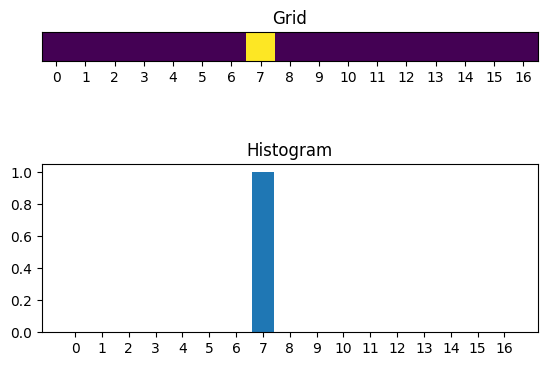

In [1]:
from ex2_1 import *
%matplotlib inline

belief = np.zeros(17)

# initial known position
x_start = 7
belief[x_start] = 1.0

plot_belief(belief)

In [2]:
print(belief, len(belief), sep='\n')

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
17


## The plots above shows the initial belief about the position of the robot both as weights in the grid world and as a histogram.

1. **[4.0]** Implement the motion model (`motion_model`) and estimate recursively the belief about the position of the robot after executing the following sequence of commands: 
$$ F, F, F, F, B, B, F, F, B $$
Plot the final belief using the `plot_belief` function.

In [3]:
# let's first do this with the simple motion model first
commands = ['F', 'F', 'F', 'F', 'B', 'B', 'F', 'F', 'B']
beliefs = [belief]
for i in range(len(commands)):
    posterior = motion_model_simple(commands[i], beliefs[i])
    beliefs.append(posterior)

1.0000000000000002
[4.01357813e-05 1.92894469e-04 9.35600133e-04 3.37946752e-03
 1.09826725e-02 2.78807619e-02 6.35625731e-02 1.12185296e-01
 1.76378173e-01 1.99912911e-01 1.99340656e-01 1.15099997e-01
 6.23468826e-02 2.01533972e-02 6.41612549e-03 1.01447754e-03
 1.77978516e-04]


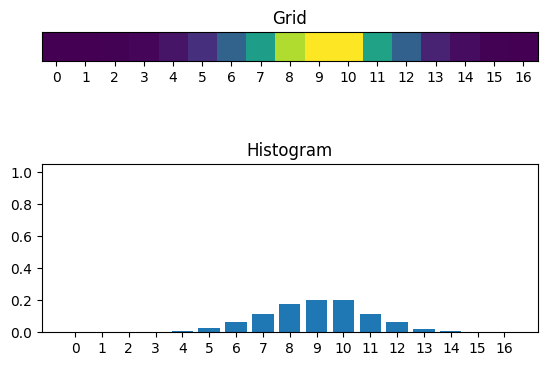

In [4]:
plot_belief(beliefs[-1])
print(sum(beliefs[-1]), beliefs[-1], sep='\n')

In [5]:
for belief in beliefs:
    print(np.sum(belief))
# just checking to see if they are all probabilities

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002


In [6]:
# Now let's see if the matrix-based function works.
belief = np.zeros(17)
x_start = 7
belief[x_start] = 1.0

In [7]:
beliefs = [belief] # record all the beliefs as they evolve over time
commands = ['F', 'F', 'F', 'F', 'B', 'B', 'F', 'F', 'B']
prior = belief
for command in commands:
    posterior = motion_model_matrix(command, prior)@prior
    beliefs.append(posterior)
    prior = posterior

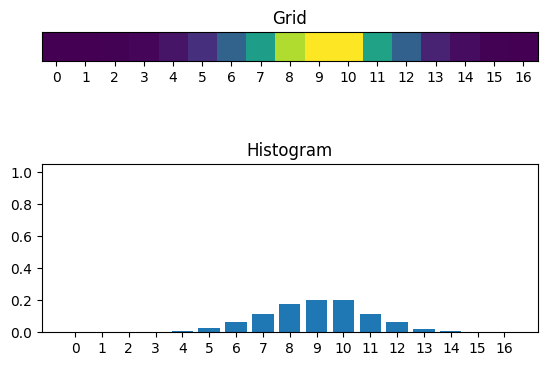

In [8]:
plot_belief(beliefs[-1])

In [9]:
# Looks similar to the simple function, but that's obvious since the update mechanism is the same in both functions.
# Only here they're all encoded into a matrix and then the 17 values of x are updated all at once.
# Either they're both wrong or both correct.

---

## Bayes filter [4.0]

Now, assume that we equipped the robot with a sensor which is able to recognize the color of the floor on which the robot navigates.

The floor can be either black (**0**) or white (**1**) and the environment looks as follows:

![gridworld_map](./pics/gridworld_floor.png)

The map of the floor colors is stored in `world.data`.

The sensor is able to recognize that:

- a tile is **white** with probability **0.75** 
- a tile is **black** with probability **0.85** 

The robot starts again in `7`. It executes the same commands as in 1. and follows the same motion model.

During navigation, it makes the observations stored in `observations.data`.

Thanks to its new sensor, it can now use the observations to estimate its position in the world.


2. **[3.5]** Implement the function `sensor_model` which defines the sensor model and implement `recursive_bayes_filter` fucntion which estimates recursively the belief about the position of the robot incorporating the observations.
Plot the final belief using the `plot_belief` function.

3. **[0.5]** Print out the most likely position and the corresponding probability.

In [10]:
# given the robot is on a white tile, the possibility of observing white is 0.75 >> p(z='white'|x_color='white') = 0.75. Notice that this is
# equivalent to p(z='white'|x = 2) = p(z='white'|x = 3) = p(z='white'|x = 5) = p(z='white'|x = 8) = ... = p(z='white'|x = 16) = 0.75. In other words,
# given that we're on an x value whose color is known to be white according to the color map, the probability of observing a white tile is 0.75.
# similarly:
# p(z='black'|x_color='black') = 0.85 >> p(z='black'|x = 0) = p(z='black'|x = 1) = p(z='black'|x = 4) = p(z='black'|x = 6) = ... =
# = p(z='black'|x = 15) = 0.85

In [11]:
import numpy as np
world_color_map, observations = np.genfromtxt('world.data', delimiter=','), np.genfromtxt('observations.data', delimiter=',')
print(world_color_map, type(world_color_map[0]), observations, type(observations[0]), sep='\n')

[0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
<class 'numpy.float64'>
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
<class 'numpy.float64'>


In [12]:
belief = np.zeros(17)
x_start = 7
belief[x_start] = 1.0
belief

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
states = recursive_bayes_filter(commands, observations, belief, world_color_map)

The most likely final position: 
9
with probability:
0.39122594820745543


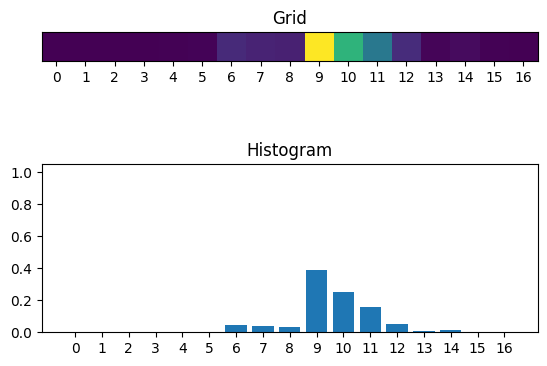

In [14]:
plot_belief(states[-1])
print('The most likely final position: ', np.argmax(states[-1]), 'with probability:', np.max(states[-1]), sep='\n')

---

## Bayes filter with unknown initial position [2.0]


What if the initial position of the robot is unknown?

Consider the same task as in 2. but with the initial belief about the position of the robot being an uniform probability distribution over the world.

2. **[1.5]** Plot the final belief about the position of the robot.

3. **[0.5]** Print out the most likely position and the corresponding probability.

In [15]:
initial_ignorance = (1/17)*np.ones(17)
print(initial_ignorance)

[0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353]


The most likely final position: 
9
with probability:
0.1955807720557162


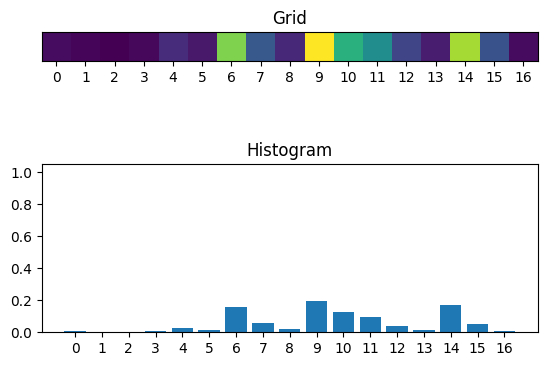

In [16]:
states_2 = recursive_bayes_filter(commands, observations, initial_ignorance, world_color_map)
plot_belief(states_2[-1])
print('The most likely final position: ', np.argmax(states_2[-1]), 'with probability:', np.max(states_2[-1]), sep='\n')